In [2]:
%reload_ext autoreload
%autoreload 2

In [4]:
from ripple_heterogeneity.utils import (
    functions,
    loading,
)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import warnings
import scipy.io as sio

functions.set_plotting_defaults()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

In [16]:
def load_mua(basepath):
    """
    Loads the MUA data from the basepath.
    input:
        basepath: str
            The path to the folder containing the MUA data.
    output:
        mua_data: pandas.DataFrame
            The pandas.DataFrame containing the MUA data

    """

    # locate .mat file
    try:
        filename = glob.glob(basepath+os.sep+'*mua_ca1_pyr.events.mat')[0]
    except:
        # warnings.warn("file does not exist")
        return pd.DataFrame()

    # load matfile
    data = sio.loadmat(filename)

    # pull out and package data
    df = pd.DataFrame()
    df["start"] = data['HSE']["timestamps"][0][0][:, 0]
    df["stop"] = data['HSE']["timestamps"][0][0][:, 1]
    df["peaks"] = data['HSE']["peaks"][0][0]
    df["center"] = data['HSE']["center"][0][0]
    df["duration"] = data['HSE']["duration"][0][0]
    df["amplitude"] = data['HSE']["amplitudes"][0][0]
    df["amplitudeUnits"] = data['HSE']["amplitudeUnits"][0][0][0]
    df["detectorName"] = data['HSE']["detectorinfo"][0][0]["detectorname"][0][0][0]

    # get basename and animal
    normalized_path = os.path.normpath(filename)
    path_components = normalized_path.split(os.sep)
    df["basepath"] = basepath
    df["basename"] = path_components[-2]
    df["animal"] = path_components[-3]

    return df

In [24]:
df = load_mua(r"Z:\Data\AYAold\AB1\day1")
df

,start,stop,peaks,center,duration,amplitude,amplitudeUnits,detectorName,basepath,basename,animal
0,3.188,3.282,3.236,3.2350,0.094,6.358963,spikes,find_HSE,Z:\Data\AYAold\AB1\day1,day1,AB1
1,3.733,3.837,3.788,3.7850,0.104,5.601151,spikes,find_HSE,Z:\Data\AYAold\AB1\day1,day1,AB1
2,6.396,6.517,6.449,6.4565,0.121,4.827183,spikes,find_HSE,Z:\Data\AYAold\AB1\day1,day1,AB1
3,6.633,6.750,6.709,6.6915,0.117,3.287016,spikes,find_HSE,Z:\Data\AYAold\AB1\day1,day1,AB1
4,8.947,9.048,8.982,8.9975,0.101,3.263011,spikes,find_HSE,Z:\Data\AYAold\AB1\day1,day1,AB1
...,...,...,...,...,...,...,...,...,...,...,...
1319,4203.691,4203.767,4203.737,4203.7290,0.076,3.118147,spikes,find_HSE,Z:\Data\AYAold\AB1\day1,day1,AB1
1320,4205.262,4205.333,4205.297,4205.2975,0.071,3.012205,spikes,find_HSE,Z:\Data\AYAold\AB1\day1,day1,AB1
1321,4206.156,4206.255,4206.218,4206.2055,0.099,4.385864,spikes,find_HSE,Z:\Data\AYAold\AB1\day1,day1,AB1
1322,4207.090,4207.356,4207.199,4207.2230,0.266,6.243626,spikes,find_HSE,Z:\Data\AYAold\AB1\day1,day1,AB1


<AxesSubplot:>

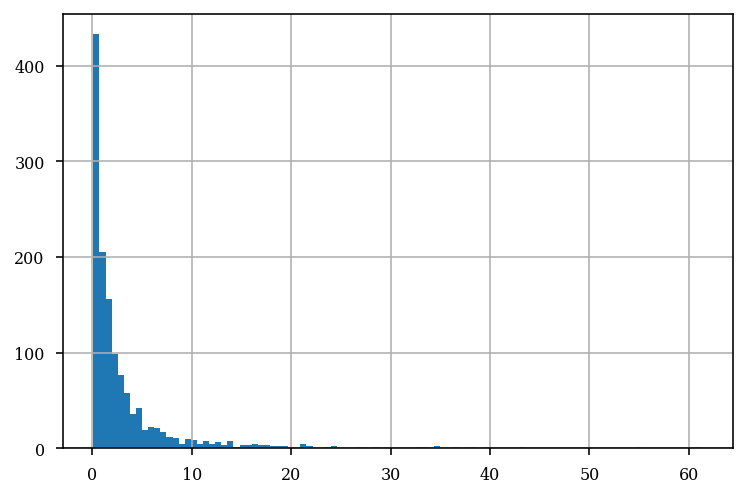

In [23]:
df.peaks.diff().hist(bins=100)